In [24]:
import os
def savefig(fig, name):
    if not os.path.exists('images'):
        os.makedirs('images')
    fig.savefig('images/' + name + '.png')

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear Regression

In [25]:
import numpy as np

np.random.seed(42)
m = 100 # the number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

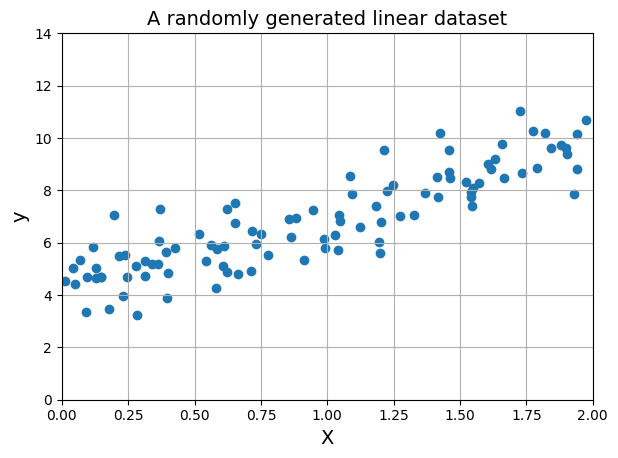

In [26]:
plt.scatter(X, y)
plt.title('A randomly generated linear dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0, 2, 0, 14])
plt.tight_layout()
plt.grid()
savefig(plt, 'linear_dataset')
plt.show()

In [27]:
from sklearn.preprocessing import add_dummy_feature
# using the normal equation
X_b = add_dummy_feature(X) # add x_0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [28]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [29]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

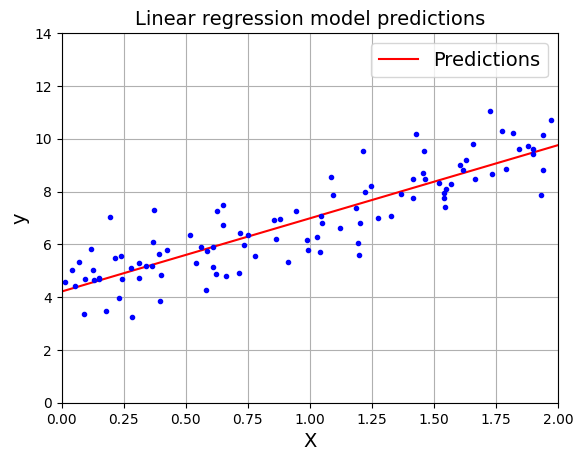

In [30]:
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.grid()
plt.title('Linear regression model predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0, 2, 0, 14])
plt.legend()
savefig(plt, 'linear_model_predictions')
plt.show()

In [31]:
# using Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [32]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [35]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [37]:
# using the pseudoinverse
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent